In [9]:
from data import load_data, GS_Dataset, make_gs_dataset, GS_Results, convert_to_narx
from model import Narx, DEVICE
from util_fun import train_narx, narx_sim_nrms, calculate_error_nrms
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
n_a=15
n_b=15
n_layers=5
n_nodes=50
n_epochs=15000

In [3]:
model=Narx(n_a+n_b,n_nodes, n_layers).to(DEVICE)

In [4]:
x_data, y_data= load_data()
data = make_gs_dataset(x_data, y_data, n_a, n_b, DEVICE)

In [5]:
results:GS_Results = train_narx(model, n_a, n_b, data, n_epochs=n_epochs)

Checkpoint at epoch 1:  

current best pred NRMS: 1.0000873050751953, previous best pred NRMS: inf 

Checkpoint at epoch 601:  

current best pred NRMS: 0.47832295117182444, previous best pred NRMS: 1.0000873050751953 

Checkpoint at epoch 1201:  

current best pred NRMS: 0.429016058583188, previous best pred NRMS: 0.47832295117182444 

Checkpoint at epoch 1801:  

current best pred NRMS: 0.4123781130240797, previous best pred NRMS: 0.429016058583188 

Checkpoint at epoch 2401:  

current best pred NRMS: 0.36780049948018023, previous best pred NRMS: 0.4123781130240797 

Checkpoint at epoch 3001:  

current best pred NRMS: 0.3411736030739112, previous best pred NRMS: 0.36780049948018023 

Checkpoint at epoch 3601:  

current pred NRMS: 0.3475887744911648, current best pred NRMS: 0.3411736030739112 

Checkpoint at epoch 4201:  

current best pred NRMS: 0.32095082101405337, previous best pred NRMS: 0.3411736030739112 

Checkpoint at epoch 4801:  

current best pred NRMS: 0.317379077541734

In [6]:
torch.save(results.best_model.state_dict(), f'narx{n_epochs//1000}K_na{n_a}_nb{n_b}_nlay{n_layers}_nnode{n_nodes}_pred')

In [12]:
x_all, y_all =convert_to_narx(data.x_data, data.y_data, n_a, n_b)
x_all, y_all=x_all.to(DEVICE), y_all.to(DEVICE)

In [13]:
f'val: {calculate_error_nrms(model(data.x_val),data.y_val)} train: {calculate_error_nrms(model(data.x_train),data.y_train)} total:{calculate_error_nrms(model(x_all),y_all)}'

'val: 0.29443960890794213 train: 0.2755025337401171 total:0.28030630708292403'

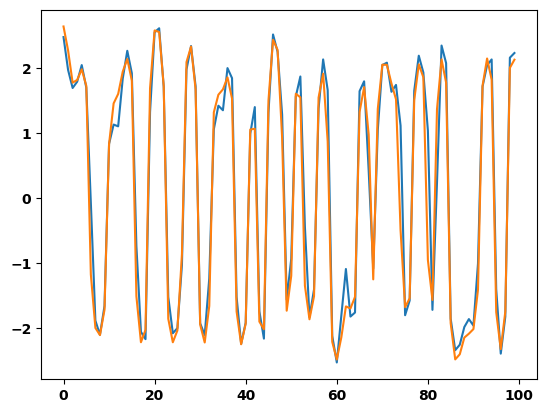

In [17]:
end=100
plt.plot(model(data.x_val).detach().cpu()[:end],)
plt.plot(data.y_val.detach().cpu()[:end])